<a href="https://colab.research.google.com/github/erukuno/coursera/blob/master/mercendeez_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/merc.csv"
merc = pd.read_csv(path)
merc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
merc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [ ]:
merc['Date'] = pd.to_datetime(merc['Date'])

In [ ]:
#Build regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [ ]:
#Split data 
X = np.array(merc.index).reshape(-1,1)
Y = merc['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
merc["Close"]=pd.to_numeric(merc.Close,errors='coerce')
merc = merc.dropna()
trainData = merc.iloc[:,4:5].values

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2193, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
print(f'Dataframe contains stock prices between {merc.Date.min()} {merc.Date.max()}') 
print(f'Total days = {(merc.Date.max()  - merc.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 24s - loss: 0.0076 - 24s/epoch - 700ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0018 - 7s/epoch - 196ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0017 - 7s/epoch - 196ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0018 - 7s/epoch - 197ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0021 - 7s/epoch - 198ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0021 - 7s/epoch - 196ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0015 - 7s/epoch - 197ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0016 - 7s/epoch - 198ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0013 - 7s/epoch - 197ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0013 - 7s/epoch - 196ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0017 - 7s/epoch - 197ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0014 - 7s/epoch - 195ms/step
Epoch 13/20
Epoch 14/20
35/35 - 7s - loss: 0.0013 - 7s/epoch - 196ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0015 - 9s/epoch - 252ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0013 - 7s/epoch - 198ms/step
Epoch 17/20
35/35 - 7s - loss: 0.0011 - 7s/epoch - 197ms/step
Epo

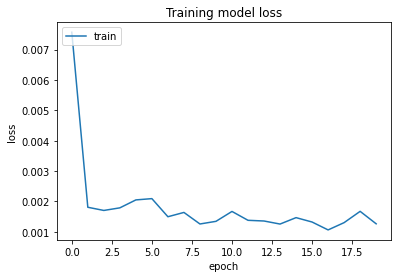

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
merc["Close"]=pd.to_numeric(merc.Close,errors='coerce')
merc = merc.dropna()
merc = merc.iloc[:,4:5]
Y_test = merc.iloc[60:,0:].values 

In [ ]:
#input array for the model
inputClosing = merc.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(merc)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(2133, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

67/67 [==============================] - 6s 62ms/step


array([[-0.00363091],
       [-0.00377081],
       [-0.00405975],
       ...,
       [ 0.7812911 ],
       [ 0.7768345 ],
       [ 0.7742773 ]], dtype=float32)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

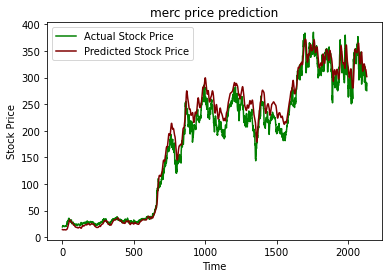

In [ ]:
plt.plot(Y_test, color = 'green', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'maroon', label = 'Predicted Stock Price')
plt.title('merc price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()